<a href="https://colab.research.google.com/github/parimalakettymuthu/MachineLearning-Projects/blob/main/AirlinesPassengers_TimeSeries_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
airline_df = pd.read_csv('/content/drive/My Drive/data/time-series-data/AirPassengers.csv')

In [4]:
airline_df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# To install the library
!pip install pmdarima -qq

In [6]:
from pmdarima import auto_arima

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline_df['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)   


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.68 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.34 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.89 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.42 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=7.17 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 19 Apr 2023   AIC                           1019.178
Time:                                     22:06:54   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
train_dataset = airline_df.iloc[:len(airline_df)-12]  #Prepare the train dataset
test_dataset = airline_df.iloc[len(airline_df)-12:] #Prepare the test dataset

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(train_dataset['#Passengers'],
                order=(0, 1, 1),
                seasonal_order=(2, 1, 1, 12))
sarimax_output = sarimax_model.fit()


In [11]:
sarimax_output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Wed, 19 Apr 2023   AIC                            896.027
Time:                                    22:06:56   BIC                            909.922
Sample:                                         0   HQIC                           901.669
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.921      0.000      -0.447      -0.149
ar.S.L12       0.7105      0.238      2.989      0.003       0.245       1.176
ar.S.L24       0.2886      0.100      2.883      0.004       0.092       0.485
ma.S.L12      -0.9800      2.266     -0.433      0.665      -5.420       3.460
sigma2        88.2971    179.499      0.492      0.623    -263.515     440.109
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Predict the model 
start_length = len(train_dataset)  #Defined the start length

In [14]:
end_length = len(train_dataset) + len(test_dataset) - 1  #Defined the end length

In [16]:
#Run the prediction
model_pred = sarimax_output.predict(start_length, end_length, type='levels').rename("Predictions")

<Axes: >

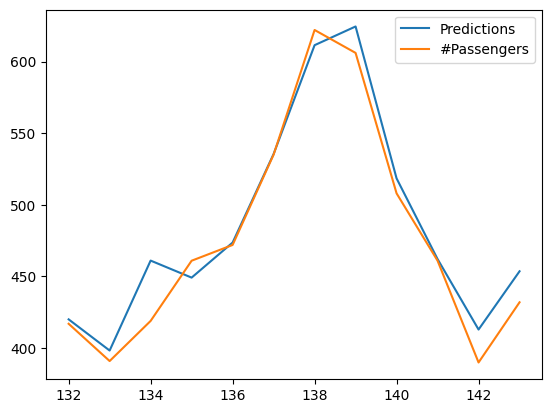

In [17]:
model_pred.plot(legend = True)
test_dataset['#Passengers'].plot(legend = True)

In [18]:
#Calculate the MSE & RMSE 
from sklearn.metrics import mean_squared_error #Imported the required models
from statsmodels.tools.eval_measures import rmse

#Calculate root mean squared error 
rmse(test_dataset["#Passengers"], model_pred)


17.167115199421534

In [20]:
mean_squared_error(test_dataset["#Passengers"], model_pred)

294.7098442702099

In [21]:
#Forecasting using ARIMA 
ARIMA_model = SARIMAX(airline_df['#Passengers'],
                      order = (0, 1, 1),
                      seasonal_order=(2, 1, 1, 12))

In [22]:
ARIMA_res = ARIMA_model.fit()

In [23]:
#run prediction
ARIMA_pred = ARIMA_res.predict(start = len(airline_df),
                               end = (len(airline_df)-1)+3*12,
                               typ = 'levels').rename('Forecast')

<Axes: >

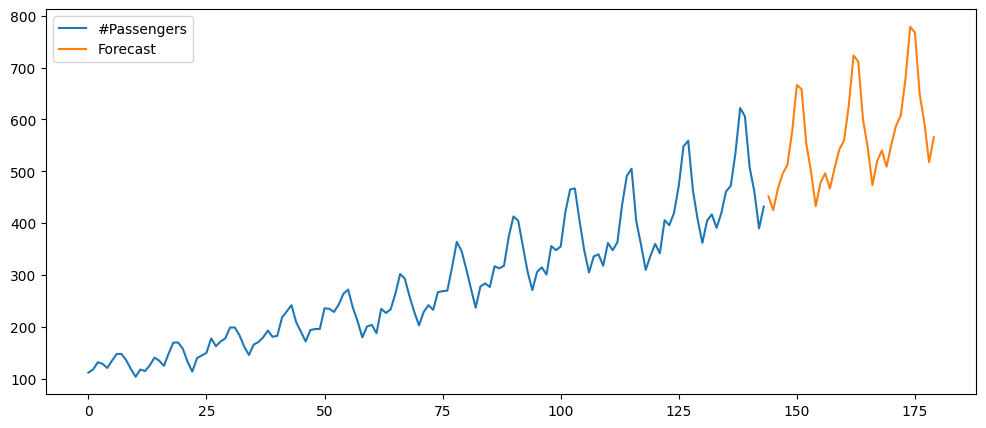

In [25]:
airline_df['#Passengers'].plot(figsize = (12, 5), legend=True)
ARIMA_pred.plot(legend = True)